# Analysis of sequential DNA-MERFISH for CTP07

by Pu Zheng

2022.05.30

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_7\20220528-CTP07chr2_hSTG


In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

27704


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_7\20220528-CTP07chr2_hSTG',
             'save_folder':r'D:\Pu_Temp\20220528-CTP07chr2_hSTG',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [3]:
folders, fovs = ia.io_tools.data.get_folders(fov_param['data_folder'])

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 15
- Number of field of views: 129


In [4]:
sel_rids = [16,21,26,
31,36,41,
46,51,56,
61,66,71,
76,81,86,
91,96,101,
106,111,116,
121,126,131,
136,141,146,
151,156,161,
166,171,176,
181,186,191,
196,201,206]


In [8]:
reload(classes.field_of_view)

<module 'ImageAnalysis3.classes.field_of_view' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes\\field_of_view.py'>

In [9]:
_overwrite = False
_save_images = True
_fit_spots = True
_warp_images = False

for _fov_id, _fov_name in enumerate(fovs):
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    
    # 2. Process image into candidate spots
    #fov.parallel = True
    #fov.unique_ref_id = 0
    #fov._process_image_to_spots('unique', 
    #                            _sel_ids=sel_rids,
    #                            _load_common_reference=True, _load_with_multiple=False,
    #                            _save_images=_save_images,
    #                            _warp_images=_warp_images, 
    #                            _fit_spots=_fit_spots,
    #                            _overwrite_drift=False, _overwrite_image=_overwrite,
   #                             _overwrite_spot=_overwrite,
   #                             _verbose=True)
    # 3. Process DAPI image
    #fov._load_dapi_image()
    
    break
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 15
- Number of field of views: 129
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_7\20220528-CTP07chr2_hSTG\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1U2', 'H2U3', 'H3U4', 'H4U5', 'H5U6', 'H6U7', 'H7U8', 'H8U9', 'H9U10', 'H10U11', 'H11U12', 'H12U13', 'H13U14', 'H14U15'])
- 15 folders are found according to color-usage annotation.
+ loading fov_info from file: D:\Pu_Temp\20220528-CTP07chr2_hSTG\Conv_zscan_000.hdf5
++ base attributes loaded:['dapi_im', 'unique_ref_im'] in 1.562s.
+ loading correction from file: D:\Pu_Temp\20220528-CTP07chr2_hSTG\Conv_zscan_000.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from

In [13]:
_fov_id = 5

fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False, # whether overwrite
                                          )

fov._load_chromosome_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 15
- Number of field of views: 129
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_7\20220528-CTP07chr2_hSTG\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0U1', 'H1U2', 'H2U3', 'H3U4', 'H4U5', 'H5U6', 'H6U7', 'H7U8', 'H8U9', 'H9U10', 'H10U11', 'H11U12', 'H12U13', 'H13U14', 'H14U15'])
- 15 folders are found according to color-usage annotation.
+ loading fov_info from file: D:\Pu_Temp\20220528-CTP07chr2_hSTG\Conv_zscan_005.hdf5
++ base attributes loaded:['dapi_im', 'unique_ref_im'] in 5.579s.
+ loading correction from file: D:\Pu_Temp\20220528-CTP07chr2_hSTG\Conv_zscan_005.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from

array([[[ 531,  531,  531, ...,  430,  399,  373],
        [ 535,  535,  535, ...,  431,  395,  374],
        [ 523,  523,  523, ...,  427,  412,  372],
        ...,
        [1941, 1941, 1942, ...,  526,  533,  573],
        [1997, 1997, 1997, ...,  530,  549,  549],
        [1936, 1936, 1936, ...,  527,  594,  487]],

       [[ 531,  531,  531, ...,  430,  399,  373],
        [ 534,  534,  535, ...,  431,  395,  374],
        [ 523,  523,  523, ...,  427,  412,  372],
        ...,
        [1941, 1941, 1941, ...,  526,  534,  573],
        [1996, 1996, 1997, ...,  530,  549,  548],
        [1936, 1936, 1936, ...,  528,  594,  486]],

       [[ 532,  532,  532, ...,  430,  399,  373],
        [ 535,  535,  535, ...,  431,  395,  374],
        [ 523,  523,  523, ...,  427,  411,  372],
        ...,
        [1942, 1942, 1942, ...,  527,  531,  573],
        [1998, 1998, 1998, ...,  531,  547,  550],
        [1937, 1937, 1937, ...,  527,  594,  487]],

       ...,

       [[ 371,  371,  37

<IPython.core.display.Javascript object>


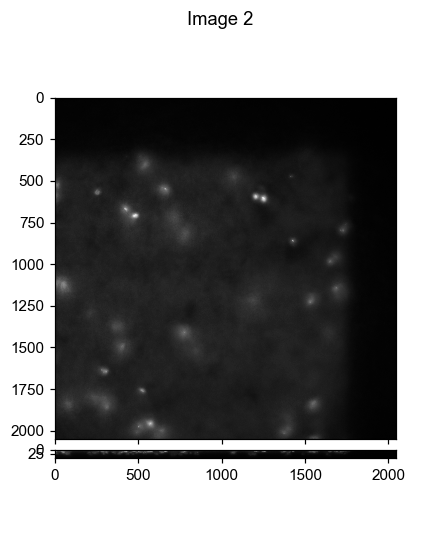

In [15]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im, fov.chrom_im])

In [17]:
fov._load_from_file('unique')

+ loading unique from file: D:\Pu_Temp\20220528-CTP07chr2_hSTG\Conv_zscan_005.hdf5
++ finish loading unique in 0.162s. 


In [25]:
_fov_id

5

In [26]:
_mask = np.load(r'D:\Pu_Temp\20220528-CTP07chr2_hSTG\Segmentation\Conv_zscan_005_Segmentation.npy')

<IPython.core.display.Javascript object>


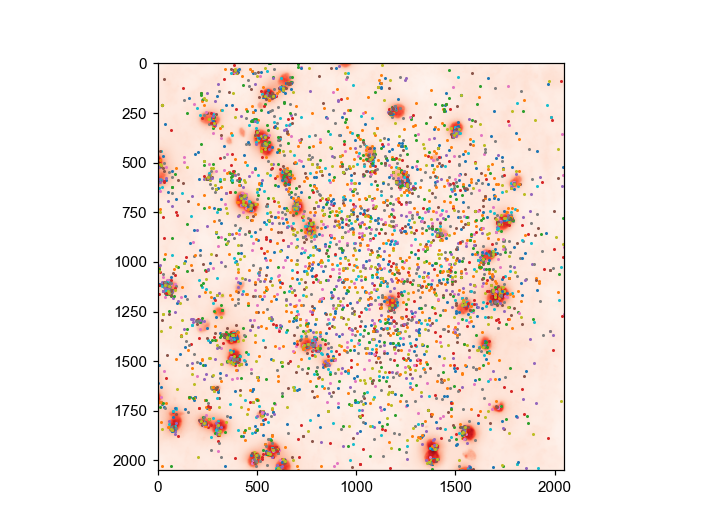

In [29]:
fig, ax = plt.subplots()
for _spots in fov.unique_spots_list:
    ax.scatter(_spots[:,3], _spots[:,2], s=1, )
ax.imshow(fov.dapi_im.max(0), cmap='Reds')
#ax.imshow(_mask.max(0), cmap='Reds')
plt.show()